<a href="https://colab.research.google.com/github/Rupa209/capstone-project-1/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np   #import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick

In [ ]:
# the file 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#path
work_dir_path = '/content/drive/MyDrive/Colab Notebooks/capstone project/'

In [ ]:
df = pd.read_csv(work_dir_path+'Hotel Bookings.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#displaying total null values
df.isna().sum().sort_values(ascending=False)[:8]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
booking_changes            0
deposit_type               0
dtype: int64

In [ ]:
#re-assigning null values
df['company'].fillna(0,inplace=True)
df['agent'].fillna(0,inplace=True)
df['country'].fillna('other',inplace=True)
df['children'].fillna(0,inplace=True)


####or we can also use this code###

#mising values
df[['agent','comapany']]=df[['agent','company']].fillna(0.0)
df['country'].fillna(df.country.mode().to_string(),inplace=True)
df['children'].fillna(round(df.children.mean()),inplace=True)



In [ ]:
#many rows contains zero guest, we can remove these rows
df[(df.babies+df.adults+df.children)==0].shape

#shape= (180, 33), remove these from the data
df= df.drop(df[(df.babies+df.adults+df.children)==0].index)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [ ]:
#converting data types
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
#convert floats in to int64
df[['children', 'company', 'agent']]=df[['children', 'company', 'agent']].astype('int64')

In [ ]:
#lets remove agent and company
hotel=df.drop(['agent','company'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

In [ ]:
#cancelled booking
hotel['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [ ]:
#customer type
hotel['customer_type'].value_counts()

Transient          89476
Transient-Party    25088
Contract            4072
Group                574
Name: customer_type, dtype: int64

There are more number of transistent customers

In [ ]:
#meal
hotel['meal'].value_counts().unique

<bound method Series.unique of BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64>

Here HB is the most preffered.

In [ ]:
#total guests
df["Total_Guests"]=df["adults"]+df["children"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

1. lets see canceled bookings ⁉

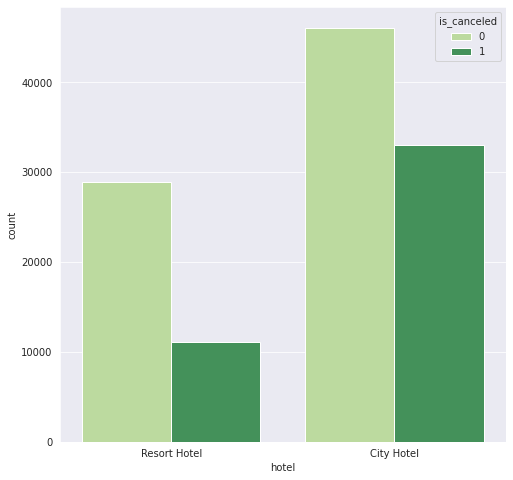

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=hotel,x='hotel',hue='is_canceled',palette='YlGn')

2.Market segment

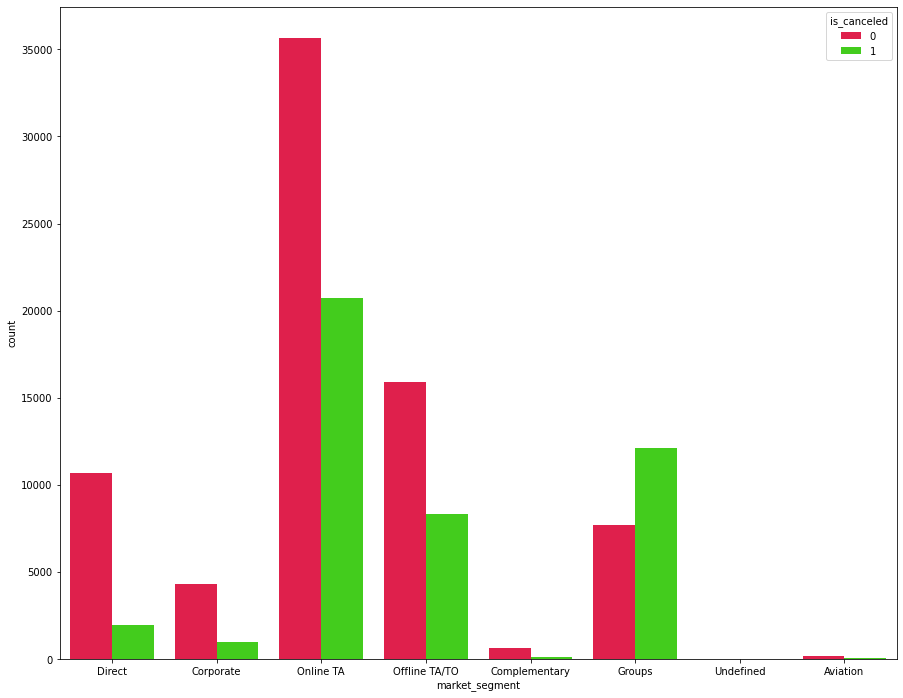

In [ ]:
#market segment
plt.figure(figsize=(15,12))
sns.countplot(x='market_segment',data=hotel,hue='is_canceled',palette='prism_r')

In [ ]:
#EDA
# to get %of different values
def get_count(series,limit=None):
  if limit !=None:
     series=series.value_counts()[:limit]
  else:
     series=series.value_counts()
  x=series.index
  y=series/series.sum()*100
  return x.values,y.values

In [ ]:
df_not_canceled=df[df['is_canceled']==0]

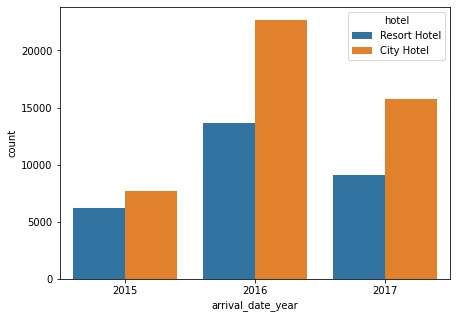

In [ ]:
#3.comapre between hotel and resort hotel
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue= 'hotel', data= df_not_canceled);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


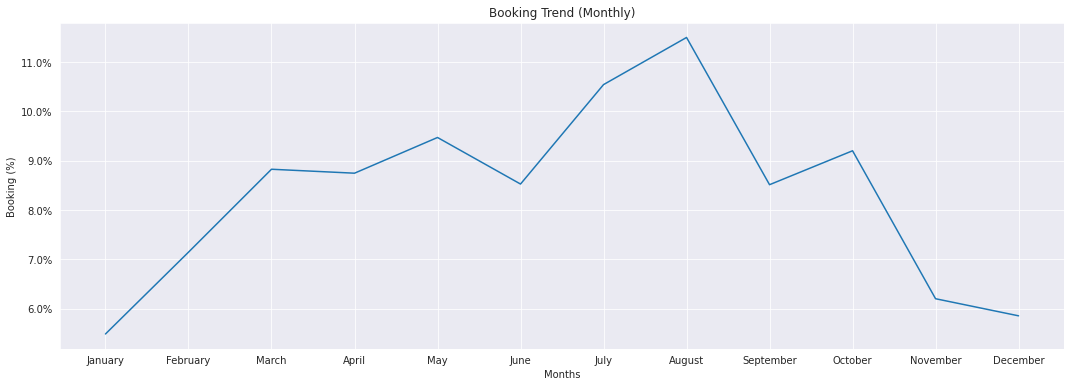

In [ ]:
#4.most occupied month for hotels
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


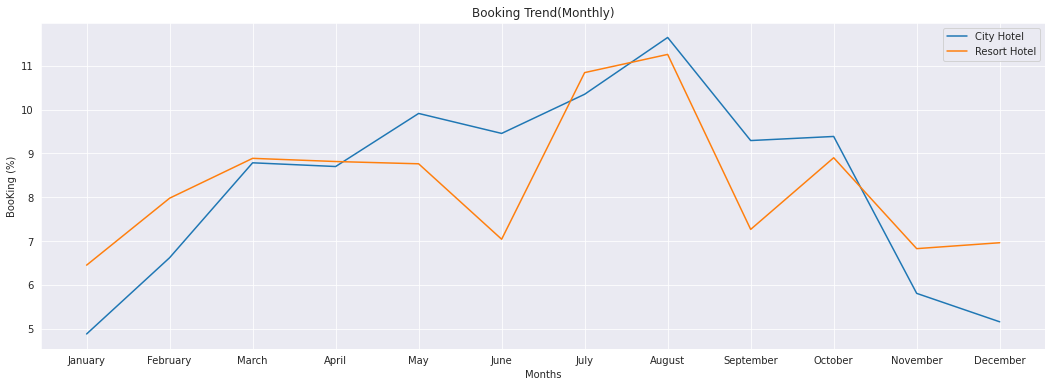

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled.loc[df.hotel=='City Hotel','arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

##for resort
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel','arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100


#line plot
fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('BooKing (%)')
ax.set_title('Booking Trend(Monthly)')

sns.lineplot(x1,y1.values,label='City Hotel',sort = False)
sns.lineplot(x2,y2.values,label='Resort Hotel',sort= False)

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


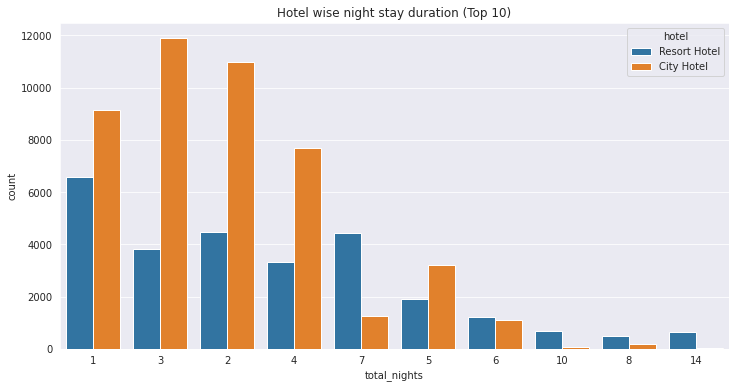

In [ ]:
#5.compare duration between hotels
df_not_canceled.loc[:,'total_nights']= df_not_canceled['stays_in_weekend_nights']+df_not_canceled['stays_in_week_nights']
fig, ax = plt.subplots(figsize=(12,6))

ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')

sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


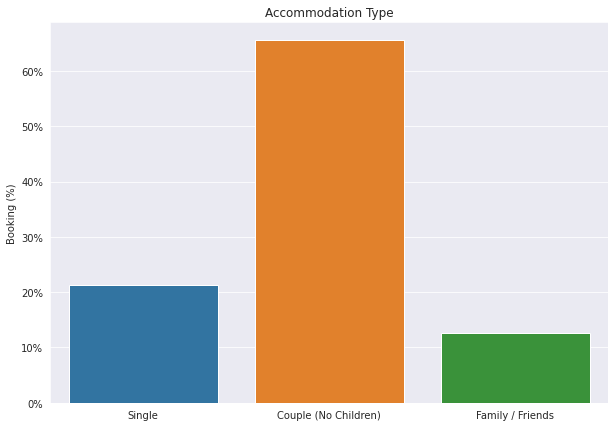

In [ ]:
#6.Most commom accomodation type(single,couple,family)
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))



In [ ]:
#7.special requests made by customers

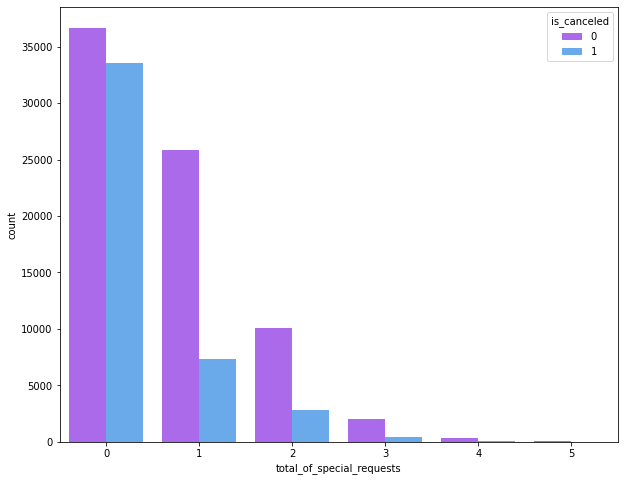

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=hotel,x='total_of_special_requests',hue='is_canceled',palette='cool_r')

**CONCLUSIONS**

We used the that contains data about hotel bokings.

We performed the exploratary data analysies to extract the information about certain things like cancelled bookings,duration of nights in two different hotels etc.......

1.Most of the bokings were cancelled in both the hotels

2.In market segment, the transaction is high through online as compared to others

3.In the comparision of the both the hotels the city hotel is in first place and resort hotel took the second

4.As we can see, Auguest is the that occupied by the customers and also Most of the bookings were made from July to Auguest .And the least bookings were made at the start and end of the year.

5.By the observation ,it is clear that most of the customers spend nights in the city hotel.

6.The most common accommodation type is the couple(no children) is mostly of 60%. 

7.The special requests made by the customers is high ,and in the same case the cancellation is also high 